In [1]:
#import basis and data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn import svm
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

#use gridsearch to find the best parameters
from sklearn.model_selection import GridSearchCV

In [2]:
#import data
#train_data = pd.read_csv('data/train.csv')
#test_data = pd.read_csv('data/test.csv')

data = pd.read_csv('data/train.csv')

In [3]:
#split data into 30% test and 70% train, random_state = 123, stratify = 'label', xtrain, xtest, ytrain, ytest

train, test = train_test_split(data, test_size=0.3, random_state=123, stratify=data['label'])

In [4]:
#random stratified sample the data 10% for quicker run time
## how can I stratify this?
#train_data = train.sample(frac=0.1, replace=True, random_state=123, )
#test_data = test.sample(frac=0.1, replace=True, random_state=123, )

train_data = train
test_data = test

# train_data = train.sample(frac=0.01, replace=True, random_state=123, )
# test_data = test.sample(frac=0.1, replace=True, random_state=123, )

In [5]:
#confirm stratification
train_data['label'].value_counts()

0    34
3    33
8    33
2    31
5    30
4    30
6    29
9    27
1    26
7    21
Name: label, dtype: int64

In [6]:
#confirm stratification
test_data['label'].value_counts()

4    20
5    19
3    14
2    12
0    12
7    11
8    11
6    10
1    10
9     7
Name: label, dtype: int64

<AxesSubplot: xlabel='label', ylabel='count'>

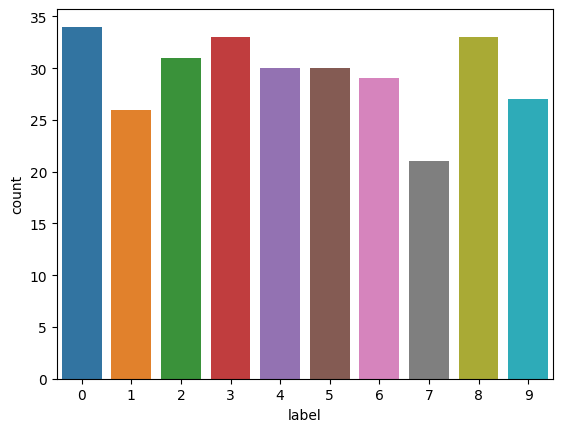

In [7]:
#graph confirm stratification
sns.countplot(x='label', data=train_data)

In [8]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
34950,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41451,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35924,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25119,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5444,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
test_data.head()
#test_data doesnt have a label column... why is that?

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
26062,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22093,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34818,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38536,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15492,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# parameters for SVM model
x_train = train_data.drop('label', axis=1)
y_train = train_data['label']
#drop the label column from the test data if exists
x_test = test_data.drop('label', axis=1)
y_test = test_data['label']

In [11]:
model_svc = SVC()

In [12]:
#fit the model
model_svc.fit(x_train, y_train)
#score the model
model_svc.score(x_train, y_train)

0.9829931972789115

In [13]:
# predict the test data
y_pred = model_svc.predict(x_test)

#accuracy score
print(accuracy_score(y_test, y_pred))

#classification report
print(classification_report(y_test, y_pred))

0.8809523809523809
              precision    recall  f1-score   support

           0       0.91      0.83      0.87        12
           1       1.00      0.90      0.95        10
           2       0.73      0.92      0.81        12
           3       0.87      0.93      0.90        14
           4       0.84      0.80      0.82        20
           5       0.94      0.79      0.86        19
           6       0.90      0.90      0.90        10
           7       1.00      0.91      0.95        11
           8       1.00      1.00      1.00        11
           9       0.70      1.00      0.82         7

    accuracy                           0.88       126
   macro avg       0.89      0.90      0.89       126
weighted avg       0.89      0.88      0.88       126



## Seems like the model with default parameters performed best. With an accuracy of 98%

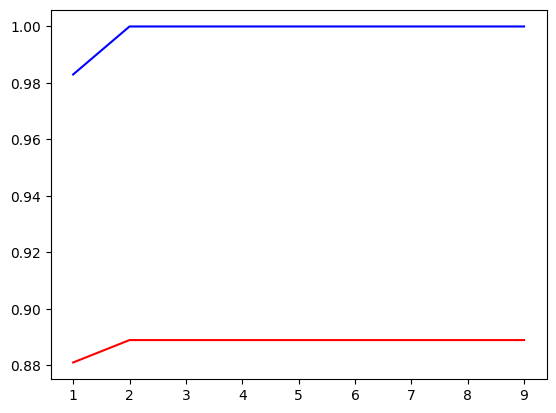

In [14]:
# for loop to create different svm models with different parameters store both the score and the model
training_acc = []
test_acc = []
maxRange = 10
for i in range(1, maxRange):
    model_svc = SVC(C=i)
    model_svc.fit(x_train, y_train)
    training_acc.append(model_svc.score(x_train, y_train))
    test_acc.append(model_svc.score(x_test, y_test))
    #if model_svc.score(x_test, y_test) = 1: stop the loop, since no test, use train for now
    # if model_svc.score(x_train, y_train) == 1:
    #     #break after next iteration
    #     break
    #print(model_svc.score(x_train, y_train))

plt.plot(range(1, len(training_acc)+1), training_acc, color="blue", label="training accuracy")
plt.plot(range(1, len(test_acc)+1), test_acc,  color="red", label="test accuracy")

In [15]:
# for loop to create different svm models with different gamma, C, and kernel parameters store both the score and the model
# training_acc = []
# test_acc = []
maxRange = 1000

#create a dictionary to store the parameters and the score
param_score = []

ker = ['linear', 'poly', 'rbf', 'sigmoid']

#for every kernel, run 5 random C and gamma values
for i in range(1, 10):
    #randomly select gamma, C, and kernel
    #random float
    gamma = np.random.uniform(1, maxRange)
    C = np.random.uniform(1, maxRange)
    for kernel in ker:
        model_svc = SVC(gamma=gamma, C=C, kernel=kernel)

        #fit the model
        model_svc.fit(x_train, y_train)

        #save the parameters and the score
        param_score.append({'gamma': gamma, 'C': C, 'kernel': kernel, 'score': model_svc.score(x_test, y_test)})
        #print(model_svc.score(x_train, y_train))

In [16]:
#convert param_score to a dataframe
param_score = pd.DataFrame(param_score)
param_score

,gamma,C,kernel,score
0,737.248404,476.519194,linear,0.873016
1,737.248404,476.519194,poly,0.857143
2,737.248404,476.519194,rbf,0.095238
3,737.248404,476.519194,sigmoid,0.095238
4,136.663123,342.283378,linear,0.873016
5,136.663123,342.283378,poly,0.857143
6,136.663123,342.283378,rbf,0.095238
7,136.663123,342.283378,sigmoid,0.095238
8,190.514161,846.903426,linear,0.873016
9,190.514161,846.903426,poly,0.857143


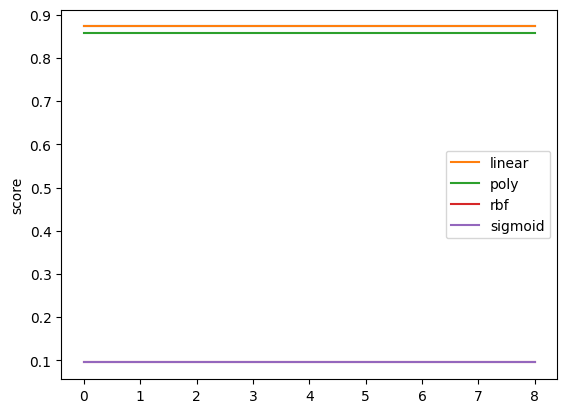

In [17]:
temp = param_score[param_score.kernel == 'linear']
temp.reset_index(inplace=True)
sns.lineplot(x=temp.index, y='score', data=temp)

#for loop to sns plots to compare the different kernels
for kernel in ker:
    temp = param_score[param_score.kernel == kernel]
    temp.reset_index(inplace=True)
    sns.lineplot(x=temp.index, y='score', data=temp, label=kernel)

In [18]:
# #figure size
# plt.figure(figsize=(10, 6))
# #plot the training accuracy from 1 to maxRange
# plt.plot(range(1, len(training_acc)+1), training_acc,color="blue", label="training accuracy")
# plt.plot(range(1, len(training_acc)+1), test_acc, color = 'red', label="testing accuracy")

# #show data by kernel, 
# plt.legend()
# plt.show()


In [19]:
# print(param_score)

In [20]:
#using the best parameters from the loop above
model_svcFinal = SVC(gamma='auto', C=3, kernel='poly')
model_svcFinal.fit(x_train, y_train)
model_svcFinal.score(x_train, y_train)

1.0

In [21]:
#score test data
model_svcFinal.score(x_test, y_test)

0.8571428571428571

In [22]:
#predict test data
y_pred = model_svcFinal.predict(x_test)

#accuracy score

print(accuracy_score(y_test, y_pred))

#classification report
print(classification_report(y_test, y_pred))

0.8571428571428571
              precision    recall  f1-score   support

           0       1.00      0.75      0.86        12
           1       0.59      1.00      0.74        10
           2       0.90      0.75      0.82        12
           3       0.81      0.93      0.87        14
           4       0.85      0.85      0.85        20
           5       0.87      0.68      0.76        19
           6       0.90      0.90      0.90        10
           7       1.00      0.91      0.95        11
           8       1.00      1.00      1.00        11
           9       0.88      1.00      0.93         7

    accuracy                           0.86       126
   macro avg       0.88      0.88      0.87       126
weighted avg       0.88      0.86      0.86       126



In [23]:
model_svcFinal.score(x_train, y_train)

1.0

In [24]:
model_svcFinal.score(x_test, y_test)

0.8571428571428571

In [25]:
# pipeline and gridsearch
# create a pipeline

In [26]:
#pipeline and gridsearch model 
model_svcFinal2 = make_pipeline(StandardScaler(), SVC(gamma='auto', C=3, kernel='poly', random_state=123))



#parameters to test
ker = ['linear', 'poly', 'rbf', 'sigmoid']
gamma = np.random.uniform(1, maxRange, 5)
C = np.random.uniform(1, maxRange, 5)

#add parameters to a dictionary
param_grid = {'svc__gamma': gamma, 'svc__C': C, 'svc__kernel': ker}

#use gridsearch to find the best parameters
grid = GridSearchCV(model_svcFinal2, param_grid, cv=5, return_train_score=True)
grid.fit(x_train, y_train)

#best parameters
grid.best_params_

# model_svcFinal.fit(x_train, y_train)

{'svc__C': 922.3623077213499,
 'svc__gamma': 738.7822639855148,
 'svc__kernel': 'linear'}

In [27]:
grid.score(x_train, y_train)

1.0

In [28]:
grid.score(x_test, y_test)

0.873015873015873